In [1]:
import pandas as pd
import numpy as np

# Wir laden die Daten direkt von einer URL (Kaggle Trainings-Daten)
url = "https://raw.githubusercontent.com/dsindy/kaggle-titanic/master/data/train.csv"
df = pd.read_csv(url)

# Wir schauen uns die ersten 5 Passagiere an
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [2]:
# Zeig mir die Summe aller fehlenden Werte pro Spalte
print(df.isnull().sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


In [3]:
# 1. Durchschnittsalter berechnen
average_age = df['Age'].mean()
print("Durchschnittsalter:", average_age)

# 2. Lücken füllen (fillna = fill Not Available)
df['Age'] = df['Age'].fillna(average_age)

# 3. Checken, ob die Lücken beim Alter weg sind
print(df.isnull().sum())

Durchschnittsalter: 29.69911764705882
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


In [4]:
# 1. Spalten löschen, die wir nicht brauchen
df = df.drop(columns=['Cabin', 'Name', 'Ticket', 'PassengerId'])

# 2. Geschlecht in Zahlen umwandeln (Mapping)
# male wird 0, female wird 1
df['Sex'] = df['Sex'].map({'male': 0, 'female': 1})

# 3. Hafen (Embarked) in Zahlen umwandeln
# S=0, C=1, Q=2
df['Embarked'] = df['Embarked'].map({'S': 0, 'C': 1, 'Q': 2})

# 4. Es gibt noch 2 Passagiere ohne Hafen -> Die Zeilen löschen wir einfach
df = df.dropna()

# Ergebnis anschauen
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,0,22.0,1,0,7.2500,0.0
1,1,1,1,38.0,1,0,71.2833,1.0
2,1,3,1,26.0,0,0,7.9250,0.0
3,1,1,1,35.0,1,0,53.1000,0.0
4,0,3,0,35.0,0,0,8.0500,0.0


In [5]:
from sklearn.model_selection import train_test_split

# 1. X und y definieren
X = df.drop('Survived', axis=1) # Alles außer Überlebt
y = df['Survived']              # Nur Überlebt

# 2. Aufteilen in Training (80%) und Test (20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Check: Wie viele Daten haben wir?
print("Trainingsdaten:", X_train.shape)
print("Testdaten:", X_test.shape)

Trainingsdaten: (711, 7)
Testdaten: (178, 7)


In [6]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# 1. Das Modell erstellen
model = RandomForestClassifier(n_estimators=100, random_state=42)

# 2. Trainieren (Lernen von den 711 Passagieren)
model.fit(X_train, y_train)

# 3. Vorhersagen machen (für die Test-Passagiere)
predictions = model.predict(X_test)

# 4. Prüfen: Wie oft lag die KI richtig?
accuracy = accuracy_score(y_test, predictions)

print(f"Genauigkeit: {accuracy * 100:.2f}%")

Genauigkeit: 75.84%


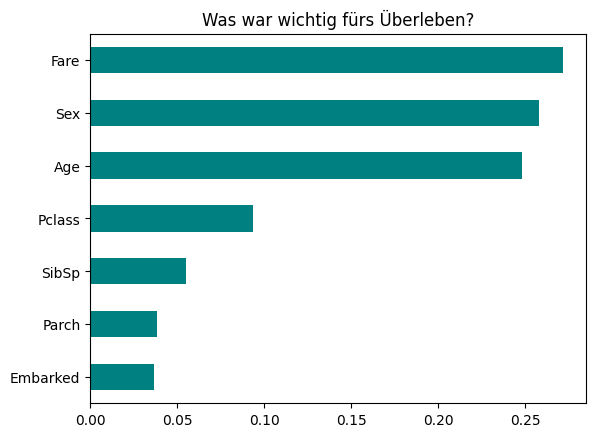

In [7]:
import matplotlib.pyplot as plt

# Wir holen uns die Wichtigkeit aus dem Modell
wichtigkeit = pd.Series(model.feature_importances_, index=X.columns)

# Wir sortieren und plotten es als Balkendiagramm
wichtigkeit.sort_values().plot(kind='barh', color='teal')
plt.title("Was war wichtig fürs Überleben?")
plt.show()

In [8]:
# Wir bauen einen neuen Passagier: [Pclass, Sex, Age, SibSp, Parch, Fare, Embarked]
# Denk dran: Sex (0=Mann, 1=Frau), Embarked (0=Southampton)

# Szenario 1: Der arme Student (3. Klasse, Mann)
mein_passagier = [[3, 0, 25, 0, 0, 10, 0]]

# Vorhersage machen
ergebnis = model.predict(mein_passagier)

if ergebnis[0] == 1:
    print("Glückwunsch! Du hättest ÜBERLEBT! 🟢")
else:
    print("Oh nein... Du bist leider UNTERGEGANGEN. 🔴")

Oh nein... Du bist leider UNTERGEGANGEN. 🔴


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [9]:
# Szenario 2: Die reiche Lady (1. Klasse, Frau, teures Ticket)
# Pclass=1, Sex=1 (Frau), Age=25, SibSp=0, Parch=0, Fare=300 (Teuer!), Embarked=0
mein_passagier = [[1, 1, 25, 0, 0, 300, 0]]

# Vorhersage
ergebnis = model.predict(mein_passagier)

if ergebnis[0] == 1:
    print("Glückwunsch! Du hättest ÜBERLEBT! 🟢")
else:
    print("Oh nein... Du bist leider UNTERGEGANGEN. 🔴")

Glückwunsch! Du hättest ÜBERLEBT! 🟢


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
